## Load the Data

In [3]:
# Specify the path to your directory in your Google Drive that contains the files
data_dir = '/content/drive/MyDrive/gbm_tcga'

# List all the files in the directory
!ls $data_dir

 case_lists
 data_clinical_patient.txt
 data_clinical_sample.txt
 data_cna_hg19.seg
 data_cna.txt
 data_gistic_genes_amp.txt
'data_gistic_genes_del (1).txt'
 data_gistic_genes_del.txt
 data_linear_cna.txt
 data_methylation_hm27.txt
 data_methylation_hm450.txt
 data_mrna_affymetrix_microarray.txt
 data_mrna_affymetrix_microarray_zscores_ref_all_samples.txt
 data_mrna_affymetrix_microarray_zscores_ref_diploid_samples.txt
 data_mrna_agilent_microarray.txt
 data_mrna_agilent_microarray_zscores_ref_all_samples.txt
 data_mrna_agilent_microarray_zscores_ref_diploid_samples.txt
 data_mrna_seq_v2_rsem.txt
 data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt
 data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt
 data_mutations.txt
 data_mutsig.txt
'data_rppa (1).txt'
 data_rppa.txt
'data_rppa_zscores (1).txt'
 data_rppa_zscores.txt
 LICENSE
 meta_clinical_patient.txt
 meta_clinical_sample.txt
'meta_cna_hg19_seg (1).txt'
 meta_cna_hg19_seg.txt
 meta_cna.txt
'meta_gistic_genes_amp (1).txt'
 meta_gi

In [4]:
import pandas as pd

gene_expression = pd.read_csv(f"{data_dir}/data_mrna_seq_v2_rsem.txt", sep="\t", index_col=0)

copy_number = pd.read_csv(f"{data_dir}/data_cna.txt", sep="\t", index_col=0)

mutations = pd.read_csv(f"{data_dir}/data_mutations.txt", sep="\t", index_col=0)

clinical = pd.read_csv(f"{data_dir}/data_clinical_patient.txt", sep="\t", index_col=0, skiprows=4)

methylation = pd.read_csv(f"{data_dir}/data_methylation_hm27.txt", sep="\t", index_col=0)


<ipython-input-4-9e18c3817d9d>:7: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  mutations = pd.read_csv(f"{data_dir}/data_mutations.txt", sep="\t", index_col=0)


## 1.

Describe your cancer and your pathway:
Using the CDC website, research the number of people who develop this cancer in the USA and other relevant information
Describe how your pathway can impact cancer



Glioblastoma is an aggresive form of cancer that originates in the brain. The incidence rate of glioblastoma is 3.21 in 100,000 individuals. Average age of diagnosis is 64. The survival rate past one year is 40% while survival rate past two years is just 17%

The IDH1 pathway is involved in a reaction in the citric acid cycle which is crucial for callular metabolism. This process could be involved in cancer because energy production is very important for cancerous tumors to be able to grow and develop. By increasing a cells ability to produce energy, it may be able to grow more and replicate more.

## 2.

Describe your cohort: what are the observations and what variables are there for each observation?  Include specific numbers for each.


My cohort contain tumor data from 619 individuals with glioblastoma. So 619 observations total.

There are several variables for the observations, however all data was not collected for each observation

I will be using a combination of gene expression data, copy number data, mutation data, as well as clinical data.

The gene expression data contains expression data for 20,531 genes across 153 tumor samples.

The Mutation data contains mutation information in 16,325 genes.

The copy number data contains information for 24,174 genes across 524 samples

The clinical data contains important clinical information variables such as pateint age and sex. From the clinical data, I will be using months of survival post diagnosis in this project

## 3.

Analyze the mutations of genes in your pathway: First, use the source to make a list of the genes in the pathway. You don't need intimate knowledge of the pathway to start with, just the genes in it.


A. Make a figure (such as from cBioPortal) summarizing the mutations.


In [5]:
# Make a list of genes in pathway
genes_in_pathway = ['IDH1', 'IDH2', 'NPM1', 'PLOD1', 'PLOD2', 'TET2', 'KDM1A', 'KDM1B', 'KDM2A', 'KDM2B', 'KDM3A', 'KDM3B', 'KDM4A', 'KDM4B']
# filter copy number data for genes in pathway
copy_number_filtered = copy_number[copy_number.index.isin(genes_in_pathway)]
copy_number_filtered

,Entrez_Gene_Id,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,TCGA-02-0015-01,...,TCGA-76-6662-01,TCGA-76-6663-01,TCGA-76-6664-01,TCGA-81-5910-01,TCGA-81-5911-01,TCGA-87-5896-01,TCGA-OX-A56R-01,TCGA-RR-A6KA-01,TCGA-RR-A6KB-01,TCGA-RR-A6KC-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
PLOD1,5351.0,1,0,0,0,0,0,0,0,-1,...,0,0,0,-1,0,2,-1,0,0,0
KDM1A,23028.0,1,0,0,0,0,0,0,2,0,...,0,0,0,-1,0,-1,-1,0,0,0
KDM4A,9682.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KDM3A,55818.0,1,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IDH1,3417.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PLOD2,5352.0,1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TET2,54790.0,0,0,-1,0,0,-1,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
KDM3B,51780.0,0,0,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
NPM1,4869.0,0,0,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [6]:
# Calculate the total amplifications and make a column
copy_number_filtered['Total_Amplifications'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row > 0].sum(), axis=1)

# Calculate the total deletions (sum of negative values) for each row and make a column
copy_number_filtered['Total_Deletions'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row < 0].sum(), axis=1).abs()

copy_number_filtered

<ipython-input-6-12062dec5ece>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Total_Amplifications'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row > 0].sum(), axis=1)
<ipython-input-6-12062dec5ece>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Total_Deletions'] = copy_number_filtered.iloc[:, 2:].apply(lambda row: row[row < 0].sum(), axis=1).abs()


,Entrez_Gene_Id,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,TCGA-02-0015-01,...,TCGA-76-6664-01,TCGA-81-5910-01,TCGA-81-5911-01,TCGA-87-5896-01,TCGA-OX-A56R-01,TCGA-RR-A6KA-01,TCGA-RR-A6KB-01,TCGA-RR-A6KC-01,Total_Amplifications,Total_Deletions
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
PLOD1,5351.0,1,0,0,0,0,0,0,0,-1,...,0,-1,0,2,-1,0,0,0,89,66
KDM1A,23028.0,1,0,0,0,0,0,0,2,0,...,0,-1,0,-1,-1,0,0,0,82,58
KDM4A,9682.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,87,20
KDM3A,55818.0,1,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,37,35
IDH1,3417.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,37
PLOD2,5352.0,1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,72,50
TET2,54790.0,0,0,-1,0,0,-1,0,0,0,...,0,0,0,0,-1,0,0,0,27,63
KDM3B,51780.0,0,0,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,42,49
NPM1,4869.0,0,0,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,-1,46,56


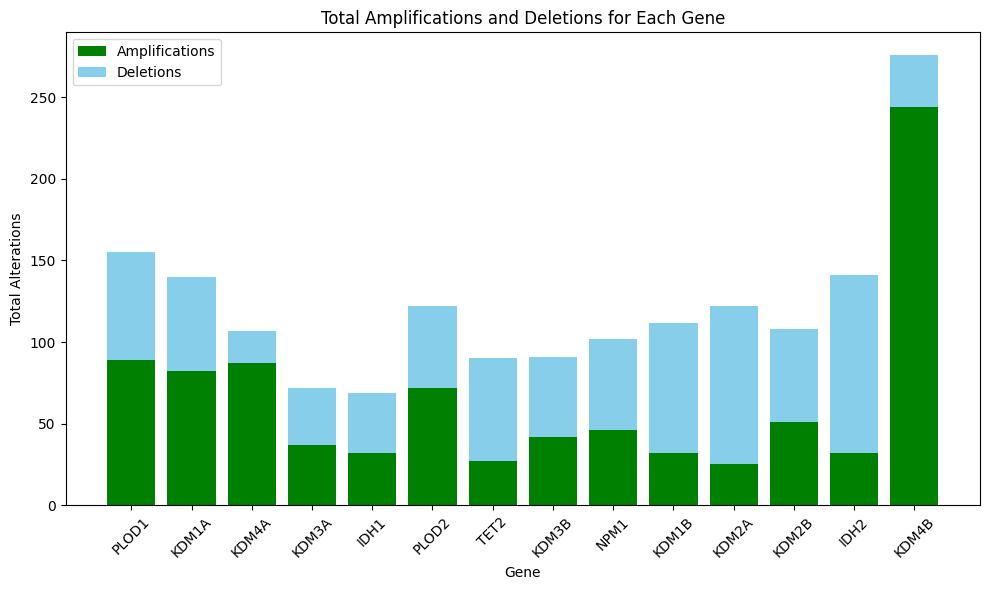

In [7]:
import matplotlib.pyplot as plt

# Plot the amplifications and deletions
plt.figure(figsize=(10, 6))
plt.bar(copy_number_filtered.index, copy_number_filtered['Total_Amplifications'], color='green', label='Amplifications')
plt.bar(copy_number_filtered.index, copy_number_filtered['Total_Deletions'], color='skyblue', label='Deletions', bottom=copy_number_filtered['Total_Amplifications'])
plt.xlabel('Gene')
plt.ylabel('Total Alterations')
plt.title('Total Amplifications and Deletions for Each Gene')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

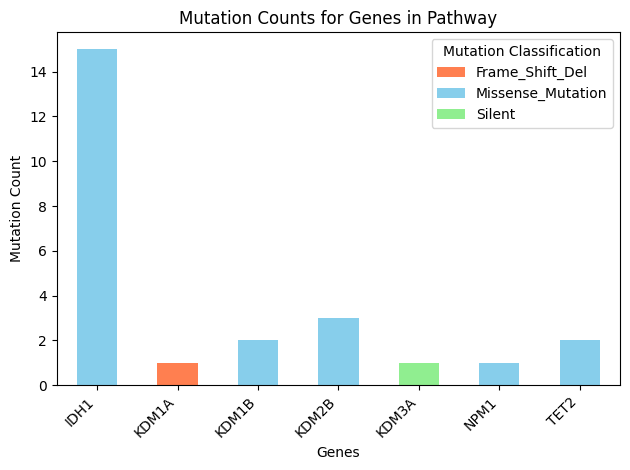

In [8]:
# Mutation Visualization
mutations_filtered = mutations[mutations.index.isin(genes_in_pathway)]

mutation_colors = {
    'Missense_Mutation': 'skyblue',
    'Silent': 'lightgreen',
    'Frame_Shift_Ins': 'salmon',
    'Frame_Shift_Del': 'coral',
    # Add more mutation classifications and their corresponding colors if needed
}

# Count the number of mutations for each gene and mutation classification
mutation_counts = mutations_filtered.groupby([mutations_filtered.index, 'Variant_Classification']).size().unstack(fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
mutation_counts.plot(kind='bar', stacked=True, color=[mutation_colors.get(c, 'gray') for c in mutation_counts.columns])
plt.title('Mutation Counts for Genes in Pathway')
plt.xlabel('Genes')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Mutation Classification')
plt.show()

B. How many patients have each gene mutated with either copy number alterations or point mutations?


In [9]:
# For copy number alterations

# get total alterations by using bool to sum up thw amount of non 0 values and make it a column
copy_number_filtered['Total_Alterations'] = copy_number_filtered.iloc[:, 2:-2].astype(bool).sum(axis=1)
# print the total alterations column
print(copy_number_filtered['Total_Alterations'])
mutation_counts['Total_Mutations'] = mutation_counts.sum(axis=1)
mutation_counts['Total_Mutations']

Hugo_Symbol
PLOD1    151
KDM1A    138
KDM4A    105
KDM3A     70
IDH1      68
PLOD2    116
TET2      89
KDM3B     90
NPM1     101
KDM1B    110
KDM2A    121
KDM2B    104
IDH2     139
KDM4B    267
Name: Total_Alterations, dtype: int64


<ipython-input-9-6cf7220c21a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_number_filtered['Total_Alterations'] = copy_number_filtered.iloc[:, 2:-2].astype(bool).sum(axis=1)


Hugo_Symbol
IDH1     15
KDM1A     1
KDM1B     2
KDM2B     3
KDM3A     1
NPM1      1
TET2      2
Name: Total_Mutations, dtype: int64

In [10]:

# Make dictionaries of the data
data_copy_number = {
    'Hugo_Symbol': ['PLOD1', 'KDM1A', 'KDM4A', 'KDM3A', 'IDH1', 'PLOD2', 'TET2', 'KDM3B', 'NPM1', 'KDM1B', 'KDM2A', 'KDM2B', 'IDH2', 'KDM4B'],
    'Total_Alterations': [152, 139, 106, 71, 69, 117, 90, 91, 102, 111, 122, 105, 140, 268]
}
data_mutations = {
    'Hugo_Symbol': ['IDH1', 'KDM1A', 'KDM1B', 'KDM2B', 'KDM3A', 'NPM1', 'TET2'],
    'Total_Mutations': [15, 1, 2, 3, 1, 1, 2]
}

# Convert dictionaries to DataFrames
df_alterations = pd.DataFrame(data_copy_number).set_index('Hugo_Symbol')
df_mutations = pd.DataFrame(data_mutations).set_index('Hugo_Symbol')

# Concatenate the DataFrames along columns with zero in the places where there is no data
df_total = pd.concat([df_alterations, df_mutations], axis=1).fillna(0)

# Calculate total alterations or mutations
df_total['Grand_Total'] = df_total.sum(axis=1)

# Display the resulting DataFrame
df_total

,Total_Alterations,Total_Mutations,Grand_Total
Hugo_Symbol,,,
PLOD1,152,0.0,152.0
KDM1A,139,1.0,140.0
KDM4A,106,0.0,106.0
KDM3A,71,1.0,72.0
IDH1,69,15.0,84.0
PLOD2,117,0.0,117.0
TET2,90,2.0,92.0
KDM3B,91,0.0,91.0
NPM1,102,1.0,103.0


C. For the top 3 most mutated genes:
how often is each gene mutated
are the mutations activating or inactivating?
Is the mutation pattern consistent with oncogene or tumor suppressor activity in cancer?


In [11]:
# create a list for the top 3 mutated genes
top_3_genes = ['KDM4B', 'PLOD1', 'IDH2']

In [12]:
# Calculate the mutation rate by dividing by the total number of tumors in the data
df_total['Mutation_Rate'] = df_total['Grand_Total'] / 577


In [13]:
df_total

,Total_Alterations,Total_Mutations,Grand_Total,Mutation_Rate
Hugo_Symbol,,,,
PLOD1,152,0.0,152.0,0.263432
KDM1A,139,1.0,140.0,0.242634
KDM4A,106,0.0,106.0,0.183709
KDM3A,71,1.0,72.0,0.124783
IDH1,69,15.0,84.0,0.145581
PLOD2,117,0.0,117.0,0.202773
TET2,90,2.0,92.0,0.159445
KDM3B,91,0.0,91.0,0.157712
NPM1,102,1.0,103.0,0.178510


In [14]:
# Filter for just the top 3 genes
mutations_top_3 = df_total[df_total.index.isin(top_3_genes)]
# show the mutation rates
mutations_top_3['Mutation_Rate']
# In KDM4B, most of the alterations were amplifications, so the mutations were mostly activating. Making KDM4B consistant with an oncogene
# In PL0D1, more of the alterations were amplifications again, but a lower overall percentage. This is still consistant with an oncogene because more of the mutations were activating
# In IDH2, more of the mutations were deletions, so mostly inactivating. This is consistant with mutation patterns of TSGs

Hugo_Symbol
PLOD1    0.263432
IDH2     0.242634
KDM4B    0.464471
Name: Mutation_Rate, dtype: float64

D. Which of your top 3 mutations is associated with increased or decreased survival outcome?



In [15]:
clinical.set_index('PATIENT_ID', inplace=True)


In [16]:
copy_number_top_3 = copy_number_filtered[copy_number_filtered.index.isin(top_3_genes)]

# Tranpose and fix the suffix so the data can be combined
clinical_data = clinical.transpose().add_suffix('-01')

# Combine the clinical and copy number data
copy_number_clinical_data = pd.concat([copy_number_top_3, clinical_data], axis=0)
copy_number_clinical_data.drop(columns=['Entrez_Gene_Id'], inplace=True)

# Filter by copy number alterations for each gene
PLOD1_filtered_df = copy_number_clinical_data.loc[:, (copy_number_clinical_data.loc['PLOD1'] != 0) & (~copy_number_clinical_data.loc['PLOD1'].isna())]
IDH2_filtered_df = copy_number_clinical_data.loc[:, (copy_number_clinical_data.loc['IDH2'] != 0) & (~copy_number_clinical_data.loc['IDH2'].isna())]
KDM4B_filtered_df = copy_number_clinical_data.loc[:, (copy_number_clinical_data.loc['KDM4B'] != 0) & (~copy_number_clinical_data.loc['KDM4B'].isna())]

PLOD1_filtered_df.loc['OS_MONTHS'] = pd.to_numeric(PLOD1_filtered_df.loc['OS_MONTHS'], errors='coerce')
IDH2_filtered_df.loc['OS_MONTHS'] = pd.to_numeric(IDH2_filtered_df.loc['OS_MONTHS'], errors='coerce')
KDM4B_filtered_df.loc['OS_MONTHS'] = pd.to_numeric(KDM4B_filtered_df.loc['OS_MONTHS'], errors='coerce')

# Drop columns with NaN values in 'OS_MONTHS' row
PLOD1_filtered_df = PLOD1_filtered_df.dropna(axis=1, subset=['OS_MONTHS'])
IDH2_filtered_df = IDH2_filtered_df.dropna(axis=1, subset=['OS_MONTHS'])
KDM4B_filtered_df = KDM4B_filtered_df.dropna(axis=1, subset=['OS_MONTHS'])

# Get the mean survival months for patients with copy number changes for each gene
os_months_mean_PLOD1 = PLOD1_filtered_df.loc['OS_MONTHS'].mean()
os_months_mean_IDH2 = IDH2_filtered_df.loc['OS_MONTHS'].mean()
os_months_mean_KDM4B = KDM4B_filtered_df.loc['OS_MONTHS'].mean()

# Display the mean
print("Mean Survival Months of PLOD1 copy number alterations:", os_months_mean_PLOD1)
print("Mean Survival Months of IDH2 copy number alterations:", os_months_mean_IDH2)
print("Mean Survival Months of KDM4B copy number alterations:", os_months_mean_KDM4B)

Mean Survival Months of PLOD1 copy number alterations: 16.01940397350994
Mean Survival Months of IDH2 copy number alterations: 16.19287769784173
Mean Survival Months of KDM4B copy number alterations: 17.341278195488712


In [17]:
clinical['OS_MONTHS'] = pd.to_numeric(clinical['OS_MONTHS'], errors='coerce')

# Calculate the mean of 'OS_MONTHS' column
os_months_mean = clinical['OS_MONTHS'].mean()

# Display the mean
print("Mean Overall Survival Months:", os_months_mean)

Mean Overall Survival Months: 16.403417508417512


As we can see, copy number alterations in these genes all had a similar mean of survival months at about 16 and 17. This is a relativly low survival outcome meaning copy number alterations in these genes are associated with a low survival outcome, but it does not stray far from the overall mean survival months which is 16.4. So, the genes are not associated with an increase or decrease in survival rate.

E. How often is the pathway mutated overall in this cancer (how many patients have one or more genes mutated)?


In [18]:
# find out how may patients have a mutation in at least 1 gene on the pathway
non_zero_columns_count = (copy_number_filtered.iloc[:, 3:-4] != 0).any().sum()
# divide that by the total amount of patients
pathway_mutation_rate = non_zero_columns_count/577

pathway_mutation_rate

0.8110918544194108

## 4.

Gene expression analysis. Pick a gene (possibly the same gene) for each of the gene expression analyses below. For each of the two types of (epi)genomic changes listed below, make a figure to visualize the association of the (epi)genomic alteration and gene expression. Then, interpret your figure: this includes stating how the (epi)genomic alteration effects this gene and what we can conclude about which subjects have oncogenic changes to this gene.

A. Association of expression and methylation at the locus.


In [19]:
# Make a list of our gene of interest
gene_of_interest = ['IDH1']

In [20]:
# Filter for the gene expression data for just IDH1
gene_expression_IDH1 = gene_expression[gene_expression.index.isin(gene_of_interest)]
gene_expression_IDH1.index = ['IDH1 Expression']
gene_expression_IDH1

,Entrez_Gene_Id,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0125-02,TCGA-06-0129-01,TCGA-06-0130-01,...,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4927-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01,TCGA-76-4932-01
IDH1 Expression,3417,2407.5725,2961.1773,2814.5646,1780.9524,3112.8049,4011.815,2028.6086,2227.121,2490.459,...,2642.2925,2328.4728,2504.952,3505.3579,1913.371,4908.4337,2752.4102,2560.5807,4893.6471,4164.1791


In [21]:
methylation_IDH1 = methylation[methylation.index.isin(gene_of_interest)]
methylation_IDH1.index = ['IDH1 Methylation']
methylation_IDH1

,Entrez_Gene_Id,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,TCGA-02-0021-01,...,TCGA-32-4213-01,TCGA-32-4719-01,TCGA-41-2571-01,TCGA-41-2572-01,TCGA-41-2573-01,TCGA-41-2575-01,TCGA-41-3392-01,TCGA-41-3393-01,TCGA-41-3915-01,TCGA-41-4097-01
IDH1 Methylation,3417.0,0.102862,0.125905,0.09363,0.0758,0.112425,0.079045,0.044267,0.051731,0.085717,...,0.029811,0.032689,0.036708,0.028917,0.038405,0.034974,0.034602,0.03532,0.034572,0.025269


In [22]:
# Combine the dfs
expression_methylation = pd.concat([gene_expression_IDH1, methylation_IDH1], axis=0)
# drop column where there is missing data
expression_methylation = expression_methylation.dropna(axis=1)
expression_methylation = expression_methylation.reset_index()

# Drop the 'Entrez_Gene_Id' column
expression_methylation = expression_methylation.drop(columns='Entrez_Gene_Id')
expression_methylation.set_index('index', inplace=True)
expression_methylation

,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0129-01,TCGA-06-0130-01,TCGA-06-0141-01,TCGA-06-0878-01,...,TCGA-32-2615-01,TCGA-32-2616-01,TCGA-32-2632-01,TCGA-32-2634-01,TCGA-32-2638-01,TCGA-32-4213-01,TCGA-41-2571-01,TCGA-41-2572-01,TCGA-41-3915-01,TCGA-41-4097-01
index,,,,,,,,,,,,,,,,,,,,,
IDH1 Expression,2407.572500,2961.177300,2814.564600,1780.952400,3112.804900,4011.815000,2227.121000,2490.459000,3402.977400,4047.844900,...,2560.259200,3223.041100,2303.951400,1653.652500,2378.537700,4134.265700,1899.496300,4450.051300,2642.292500,2328.472800
IDH1 Methylation,0.128523,0.055333,0.028326,0.026329,0.024088,0.044194,0.055093,0.050958,0.076393,0.033053,...,0.049661,0.035627,0.044109,0.030631,0.037007,0.029811,0.036708,0.028917,0.034572,0.025269


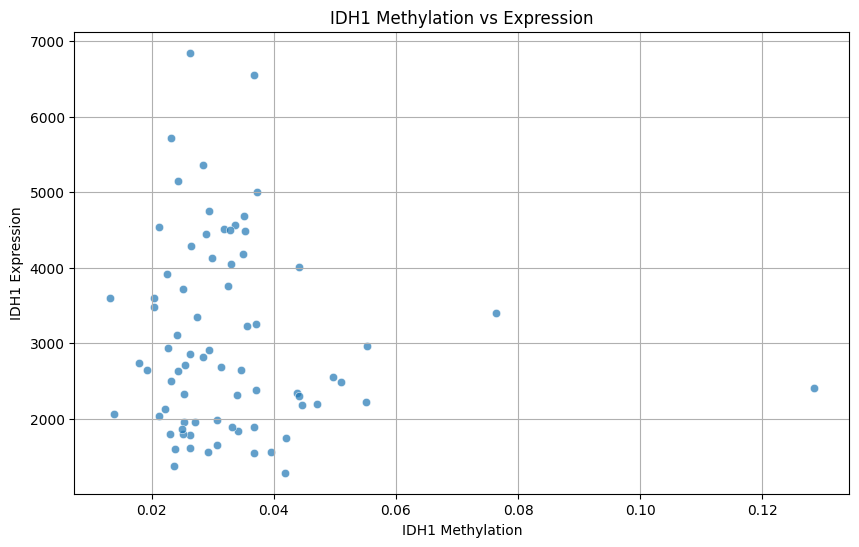

In [23]:
df = expression_methylation.transpose()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['IDH1 Methylation'], df['IDH1 Expression'], alpha=0.7, edgecolors='w', linewidths=0.5)
plt.title('IDH1 Methylation vs Expression')
plt.xlabel('IDH1 Methylation')
plt.ylabel('IDH1 Expression')
plt.grid(True)
plt.show()

To Show the relationship, I created a scatterplot with the X axis being IDH1 methylation % and the Y axis being IDH1 expression. Each dot represents a different tumor. There isn't very strong relationship shown here. Most of the tumors have a low level of methylation and a wide range of expression. The few tumors on the higher end of methylation have a relativly low expression. This means as methylation increases gene expression decreases.

B. Association of expression and copy number at the locus.


In [24]:
# Filter for the gene expression data for just IDH1
gene_expression_IDH1 = gene_expression[gene_expression.index.isin(gene_of_interest)]
gene_expression_IDH1.index = ['IDH1 Expression']
gene_expression_IDH1

,Entrez_Gene_Id,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0125-02,TCGA-06-0129-01,TCGA-06-0130-01,...,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4927-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01,TCGA-76-4932-01
IDH1 Expression,3417,2407.5725,2961.1773,2814.5646,1780.9524,3112.8049,4011.815,2028.6086,2227.121,2490.459,...,2642.2925,2328.4728,2504.952,3505.3579,1913.371,4908.4337,2752.4102,2560.5807,4893.6471,4164.1791


In [25]:
# Filter for the copy number alterations of IDH1
copy_number_IDH1 = copy_number[copy_number.index.isin(gene_of_interest)]
copy_number_IDH1.index = ['IDH1 Copy number']

copy_number_IDH1

,Entrez_Gene_Id,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,TCGA-02-0015-01,...,TCGA-76-6662-01,TCGA-76-6663-01,TCGA-76-6664-01,TCGA-81-5910-01,TCGA-81-5911-01,TCGA-87-5896-01,TCGA-OX-A56R-01,TCGA-RR-A6KA-01,TCGA-RR-A6KB-01,TCGA-RR-A6KC-01
IDH1 Copy number,3417.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Combine the dfs
combined = pd.concat([gene_expression_IDH1, copy_number_IDH1], axis=0)
# drop column where there is missing data
combined = combined.dropna(axis=1)
combined = combined.reset_index()

# Drop the 'Entrez_Gene_Id' column
combined = combined.drop(columns='Entrez_Gene_Id')
combined.set_index('index', inplace=True)

combined

#unique_values = combined.iloc[1, :].unique()
#unique_values

,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0129-01,TCGA-06-0130-01,TCGA-06-0132-01,TCGA-06-0138-01,...,TCGA-41-2571-01,TCGA-41-2572-01,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01
index,,,,,,,,,,,,,,,,,,,,,
IDH1 Expression,2407.5725,2961.1773,2814.5646,1780.9524,3112.8049,4011.815,2227.121,2490.459,3582.0265,2736.6966,...,1899.4963,4450.0513,2642.2925,2328.4728,2504.952,3505.3579,1913.371,2752.4102,2560.5807,4893.6471
IDH1 Copy number,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000


In [27]:
# Get the average expression for each copy number value

import numpy as np

# Define the IDH1 Expression row
idh1_expression = combined.iloc[0]

# Define the IDH1 Copy number row
idh1_copy_number = combined.iloc[1]

# Filter IDH1 expression based on copy number values
expression_copy_0 = idh1_expression[idh1_copy_number == 0]
expression_copy_1 = idh1_expression[idh1_copy_number == 1]
expression_copy_neg_1 = idh1_expression[idh1_copy_number == -1]

# Calculate the average expression for each copy number category
avg_expression_copy_0 = np.mean(expression_copy_0)
avg_expression_copy_1 = np.mean(expression_copy_1)
avg_expression_copy_neg_1 = np.mean(expression_copy_neg_1)

# put it into a df
average_expression_df = pd.DataFrame({
    'Copy_Number': [0, 1, -1],
    'Average_Expression': [avg_expression_copy_0, avg_expression_copy_1, avg_expression_copy_neg_1]
})
average_expression_df

,Copy_Number,Average_Expression
0,0,3214.153598
1,1,3137.948822
2,-1,2222.023322


<ipython-input-28-2b7c37f3d086>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='IDH1 Copy number', y='Expression', data=melted_df, palette='muted')


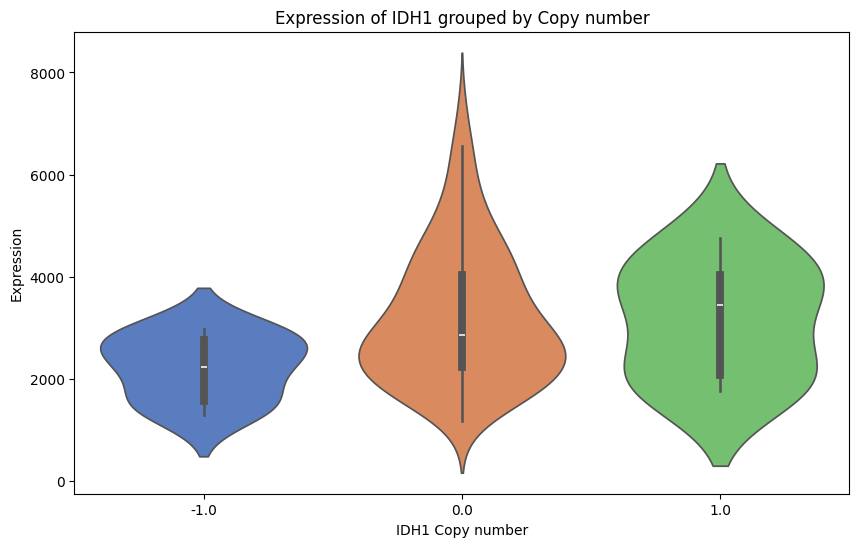

In [28]:
import seaborn as sns

# Transpose the dataframe so that each row represents a sample and each column represents a gene
combined_transposed = combined.transpose()

# Melt the dataframe to have 'IDH1 Copy number' as a categorical variable
melted_df = combined_transposed.melt(id_vars='IDH1 Copy number', var_name='Sample', value_name='Expression')

# Convert 'IDH1 Copy number' to categorical variable
melted_df['IDH1 Copy number'] = melted_df['IDH1 Copy number'].astype('category')

# Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='IDH1 Copy number', y='Expression', data=melted_df, palette='muted')
plt.xlabel('IDH1 Copy number')
plt.ylabel('Expression')
plt.title('Expression of IDH1 grouped by Copy number')
plt.show()

The plot shows that there is not much of a difference in average expression between the no change and amplifications while the deletion violin plot shows lower gene expression

## 5.

Mutual exclusivity and co-occurrence analysis. Analyze your top 3 most mutated genes from above. Make a visualization that allows you to compare mutual exclusivity or co-occurrence for all pairs of any two of these mutations.

In [29]:
# define a command to count the alterations between two genes as co-occuring or mutually exclusive
def count_alterations(gene1, gene2):
    # Start the counts at zero
    co_occurrence = 0
    mutual_exclusive = 0

# Skip the first two columns which are not sample IDs
    for sample in copy_number_top_3.columns[2:]:
        alteration_gene1 = copy_number_top_3.loc[gene1, sample]
        alteration_gene2 = copy_number_top_3.loc[gene2, sample]

        # Check for co-occurring alterations
        if alteration_gene1 > 0 and alteration_gene2 > 0:
            co_occurrence += 1
        # Check for mutually exclusive alterations
        elif (alteration_gene1 != 0 and alteration_gene2 == 0) or (alteration_gene1 == 0 and alteration_gene2 != 0):
            mutual_exclusive += 1

    return co_occurrence, mutual_exclusive

gene1 = 'PLOD1'
gene2 = 'IDH2'
gene3 = 'KDM4B'

# Print the counts to show the data for each pair of genes
co_occurrence_count_12, mutual_exclusive_count_12 = count_alterations(gene1, gene2)
print(f"Co-occurring alterations between {gene1} and {gene2}: {co_occurrence_count_12}")
print(f"Mutually exclusive alterations between {gene1} and {gene2}: {mutual_exclusive_count_12}")

co_occurrence_count_13, mutual_exclusive_count_13 = count_alterations(gene1, gene3)
print(f"Co-occurring alterations between {gene1} and {gene3}: {co_occurrence_count_13}")
print(f"Mutually exclusive alterations between {gene1} and {gene3}: {mutual_exclusive_count_13}")

co_occurrence_count_23, mutual_exclusive_count_23 = count_alterations(gene2, gene3)
print(f"Co-occurring alterations between {gene2} and {gene3}: {co_occurrence_count_23}")
print(f"Mutually exclusive alterations between {gene2} and {gene3}: {mutual_exclusive_count_23}")


Co-occurring alterations between PLOD1 and IDH2: 16
Mutually exclusive alterations between PLOD1 and IDH2: 178
Co-occurring alterations between PLOD1 and KDM4B: 44
Mutually exclusive alterations between PLOD1 and KDM4B: 254
Co-occurring alterations between IDH2 and KDM4B: 19
Mutually exclusive alterations between IDH2 and KDM4B: 272


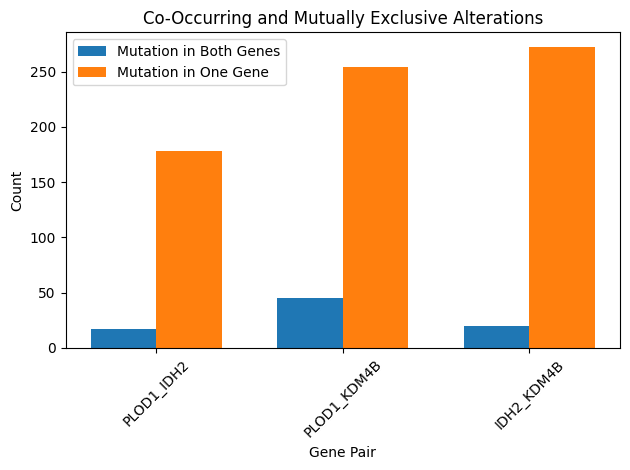

In [30]:
# Organize the data to be made into a df
gene_pairs = ['PLOD1_IDH2', 'PLOD1_KDM4B', 'IDH2_KDM4B']
co_occurrence_counts = [17, 45, 20]
mutual_exclusive_counts = [178, 254, 272]

# Create the df
data = {'Gene Pair': gene_pairs,
        'Co-Occurrence': co_occurrence_counts,
        'Mutually Exclusive': mutual_exclusive_counts}
co_occurrence_data = pd.DataFrame(data)


# Create a plot from the data
x = np.arange(len(gene_pairs))

# Set width of bars
bar_width = 0.35

# Plot
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, co_occurrence_counts, bar_width, label='Mutation in Both Genes')
bar2 = ax.bar(x + bar_width/2, mutual_exclusive_counts, bar_width, label='Mutation in One Gene')

# Add labels, title, and legend
ax.set_xlabel('Gene Pair')
ax.set_ylabel('Count')
ax.set_title('Co-Occurring and Mutually Exclusive Alterations')
ax.set_xticks(x)
ax.set_xticklabels(gene_pairs)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this visualization, we can see that most of the copy number alterations for all of these genes are occurring in only one of the genes, while a small subset of the alterations are occurring in both the genes. From this we can say that these gene pairs all tend to be mutually exclusive across the cohort.

In [31]:
co_occurrence_data

,Gene Pair,Co-Occurrence,Mutually Exclusive
0,PLOD1_IDH2,17,178
1,PLOD1_KDM4B,45,254
2,IDH2_KDM4B,20,272


## 6.

Make one other plot to learn about the effect of this pathway on this cancer, using any of the data you have about the cancer cohort. Meaning, a different from the ones already required, using coding:


Form a hypothesis of something you expect to see in this cancer data. Describe what kind of plot you choose and how it will help assess your hypothesis. What do you expect to see?


I propose that missense mutations in the IDH1 gene will cause a change in the expression of IDH1

To visualize this, I will make a bar plot with two bars. One bar will be the average IDH1 gene expression in all samples, and the second bar will be the average IDH1 expression in IDH1 samples with a missense mutation. The Y axis will be gene expression.

I expect that the average expression of the mutant IDH1 will be either much greater or less than the expression of all samples IDH1 gene expression

Provide code to make the plot. The code must work and must be explained so someone else can understand how it works

In [32]:
# Make a df with mutation data for IDH1 mutations
gene = ['IDH1']
IDH1_mutations = mutations[mutations.index.isin(gene)]

# We will use the IDH1 gene expression df from befor
gene_expression_IDH1

# Remove the Entrez_Gene_Id column
gene_expression_IDH1 = gene_expression_IDH1.drop('Entrez_Gene_Id', axis=1)

#Using this df we will get a value for the IDH1 average expression
IDH1_ave_expression = gene_expression_IDH1.mean(axis = 1)

# Now we must get the average missense mutant expression
# To do this we need to combine mutation data with gene expression data
# First we will set the Index of the IDH1 mutation data to be the tumor IDs
IDH1_mutations = IDH1_mutations.set_index('Tumor_Sample_Barcode')

# Now we will concatinate them by similar IDs
concatenated_df = pd.concat([gene_expression_IDH1, IDH1_mutations.transpose()], axis=0)

# Now we must remove the columns where there is not an IDH1 mutation or where there is not IDH1 expression data
# Remove NaN
columns_to_drop = concatenated_df.columns[concatenated_df.loc['Entrez_Gene_Id'].isna()]
filt_df = concatenated_df.drop(columns=columns_to_drop)
columns_to_drop = filt_df.columns[filt_df.loc['IDH1 Expression'].isna()]
two_filt_df = filt_df.drop(columns=columns_to_drop)
# Now we have a filtered df with just mutated IDH1 data
two_filt_df


,TCGA-02-2483-01,TCGA-06-0129-01,TCGA-06-0221-02,TCGA-06-2570-01,TCGA-06-5417-01,TCGA-15-1444-01,TCGA-19-2629-01,TCGA-26-1442-01,TCGA-27-2521-01
IDH1 Expression,2814.5646,2227.121,1642.6065,1797.207,3183.2061,1553.8531,1555.0468,1476.6649,1604.582
Entrez_Gene_Id,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0,3417.0
Center,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu,broad.mit.edu
NCBI_Build,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37,GRCh37
Chromosome,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
Annotation_Transcript,uc002vcs.3,uc002vcs.3,uc002vcs.3,uc002vcs.3,uc002vcs.3,uc002vcs.3,uc002vcs.3,uc002vcs.3,uc002vcs.3
Refseq_mRNA_Id,NM_005896,NM_005896,NM_005896,NM_005896,NM_005896,NM_005896,NM_005896,NM_005896,NM_005896
Refseq_prot_Id,NP_005887,NP_005887,NP_005887,NP_005887,NP_005887,NP_005887,NP_005887,NP_005887,NP_005887
Tumorscape_Deletion_Peaks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
IDH1_ave_expression

IDH1 Expression    3152.752356
dtype: float64

In [34]:
# Now we can get the average mutant expression
IDH1_mutant_ave_expression = two_filt_df.loc['IDH1 Expression'].mean()
IDH1_mutant_ave_expression

1983.8724444444442

In [35]:
# View the IDH1 expression transposed
gene_expression_IDH1.transpose()

,IDH1 Expression
TCGA-02-0047-01,2407.5725
TCGA-02-0055-01,2961.1773
TCGA-02-2483-01,2814.5646
TCGA-02-2485-01,1780.9524
TCGA-02-2486-01,3112.8049
...,...
TCGA-76-4927-01,4908.4337
TCGA-76-4928-01,2752.4102
TCGA-76-4929-01,2560.5807
TCGA-76-4931-01,4893.6471


In [36]:
# Get IDH1 expression for the mutants
two_filt_df.loc['IDH1 Expression']


TCGA-02-2483-01    2814.5646
TCGA-06-0129-01     2227.121
TCGA-06-0221-02    1642.6065
TCGA-06-2570-01     1797.207
TCGA-06-5417-01    3183.2061
TCGA-15-1444-01    1553.8531
TCGA-19-2629-01    1555.0468
TCGA-26-1442-01    1476.6649
TCGA-27-2521-01     1604.582
Name: IDH1 Expression, dtype: object

In [37]:
# Create the data for mutant expression
data = {
    'IDH1 Mutant Expression': [
        2814.5646,
        2227.121,
        1642.6065,
        1797.207,
        3183.2061,
        1553.8531,
        1555.0468,
        1476.6649,
        1604.582
    ]
}

# Create a DataFrame from the series
gene_expression_IDH1_mutants = pd.DataFrame(data)
gene_expression_IDH1_mutants

,IDH1 Mutant Expression
0,2814.5646
1,2227.1210
2,1642.6065
3,1797.2070
4,3183.2061
5,1553.8531
6,1555.0468
7,1476.6649
8,1604.5820


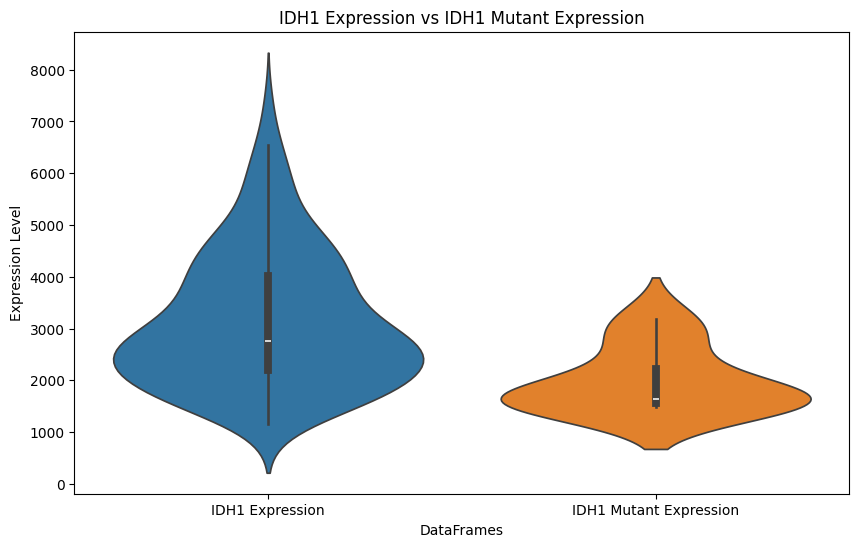

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=[gene_expression_IDH1.transpose()['IDH1 Expression'], gene_expression_IDH1_mutants['IDH1 Mutant Expression']])
plt.xlabel('DataFrames')
plt.ylabel('Expression Level')
plt.title('IDH1 Expression vs IDH1 Mutant Expression')
plt.xticks([0, 1], ['IDH1 Expression', 'IDH1 Mutant Expression'])
plt.show()

Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.

By looking at this plot we can assess if missense mutations cause a change in IDH1 gene expression. From this plot, we can see that IDH1 expression on average was lower in IDH1 mutants than all tumor IDH1.

## 7.

Find one other research article related to this type of cancer that refers to either: the activity of this pathway; or the genes/mutations in the pathway; or a drug and how it can impact that pathway in that cancer.




https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2820389/

Describe the:

knowledge gap

The knowledge gap this study was trying to fill was identifying genes alterations that were previously not known to contribute to Glioblastoma

hypothesis

The hypothesis is that by looking at mutation, expression, and copynumber data, analysis could be run to find previously unknown genes that are involved in Glioblastoma.

experimental design of the paper (what are the observations and how many observations; and what are the variables and approximately how many)

This experiment had 22 observations which were 22 different GBM tumor samples

sequence data was obtained for 20,661 tumor samples. For each gene, gene expression data as well as copy number data was obtained

Summarize how the findings in the article relates to your findings above about the pathway.


This study found a recurrent mutation in the IDH1 gene. The mutation occured in 12% of the GBM patients. In my study, I found a recurrence of mutations in IDH1 as well. The recurrent IDH1 mutations in my study were all missense mutations

Include the two most relevant figures from the paper. For each figure:

explain what are the axes (horizontal and vertical)

what the points, bars, colors mean (depending on the plot. Please see me if you are not sure which parts to explain)

Copy over one sentence (quote the sentence) showing a conclusions they made based on this figure


## First Figure

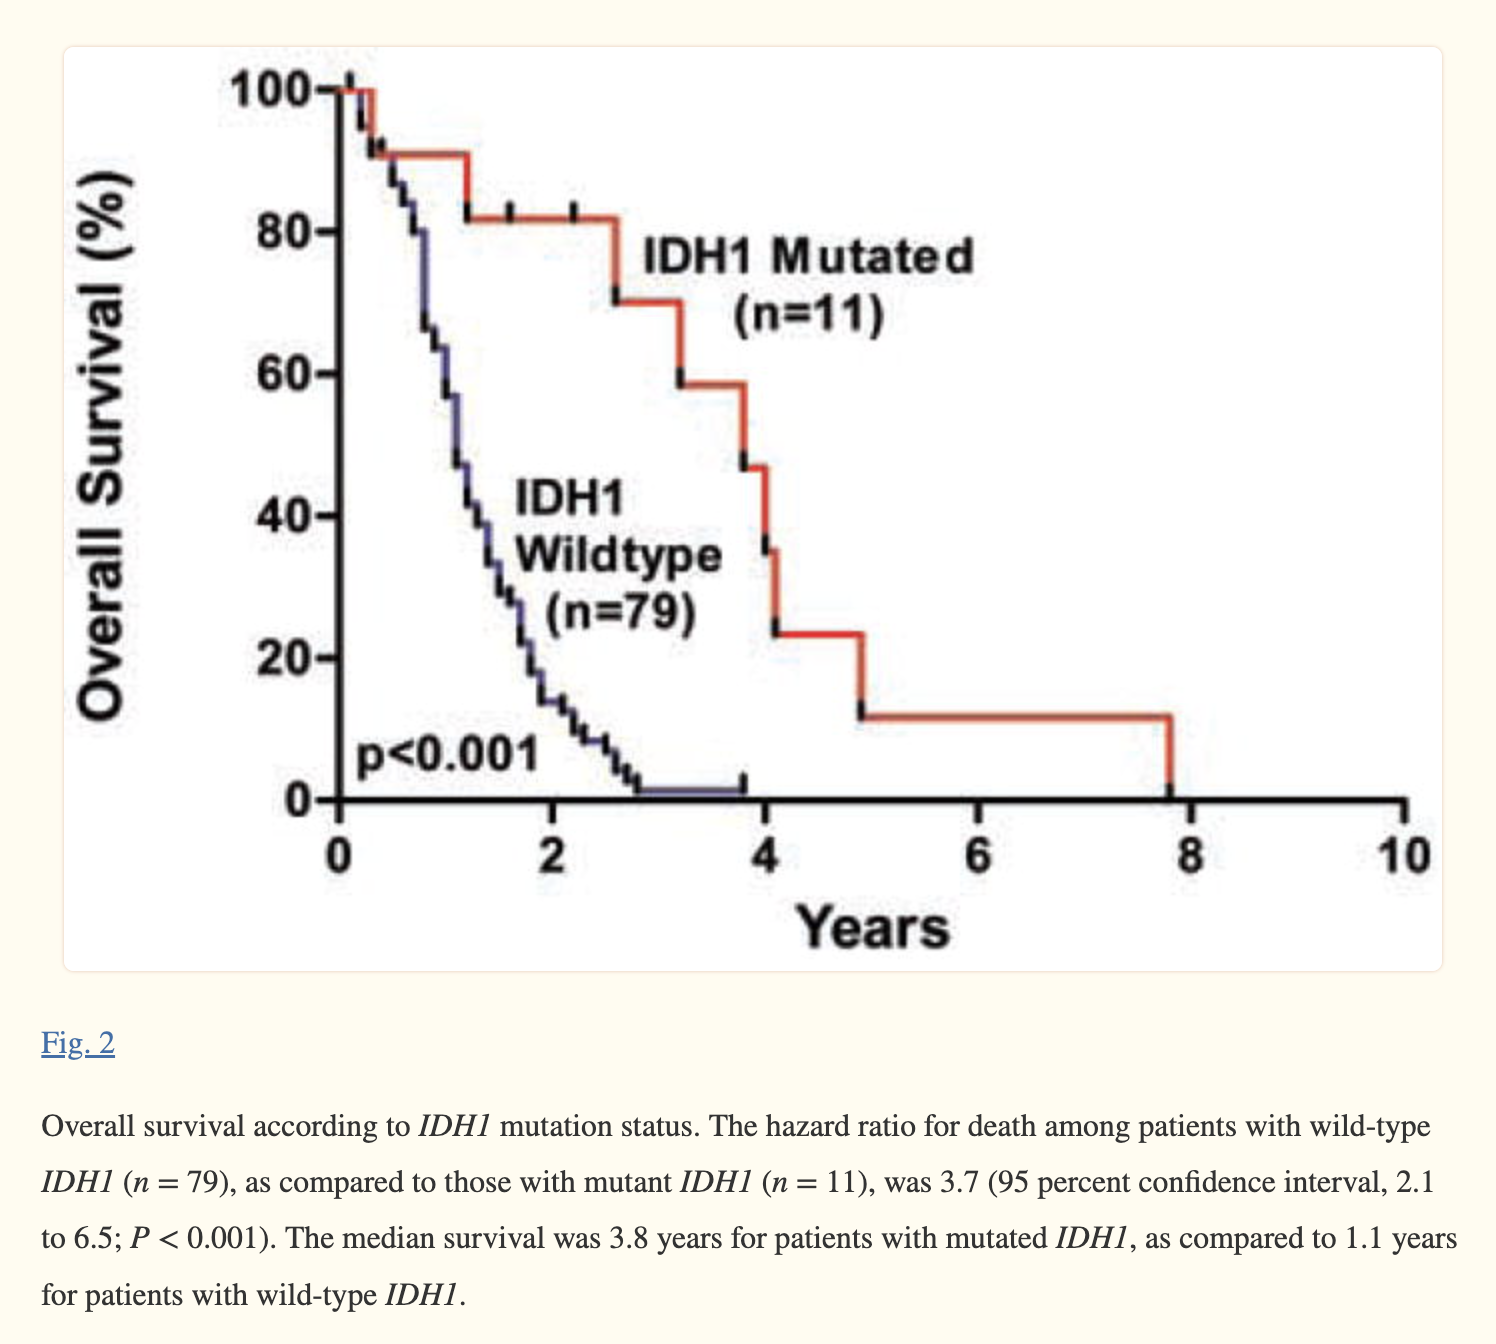

In [ ]:
from IPython.display import Image

# Path to the image
image_path = '/content/drive/MyDrive/Screen Shot 2024-04-15 at 2.12.02 PM.png'

# Display the image
display(Image(filename=image_path))


This figure is showing the overall suvival rate for IDH1 mutants and IDH1 wildtype. The Y axis shows overall survival percentage while the X axis shows years. The black line shows IDH1 wildtype while the red line shows IDH1 mutants. By looking at the figure, we can see that IDH1 mutants have a significantly longer survival average.


"patients with IDH1 mutations had a significantly improved prognosis, with a median overall survival of 3.8 years as compared to 1.1 years for patients with wild-type IDH1"

As we can see from the figure, the IDH1 wildtype patients line, which is shown in purple, falls to zero at about half the time that the red line for IDH1 mutants takes to hit zero. This means that the IDH1 mutants have almost twice the average survival as the IDH1 wildtype patients.

## Second Figure

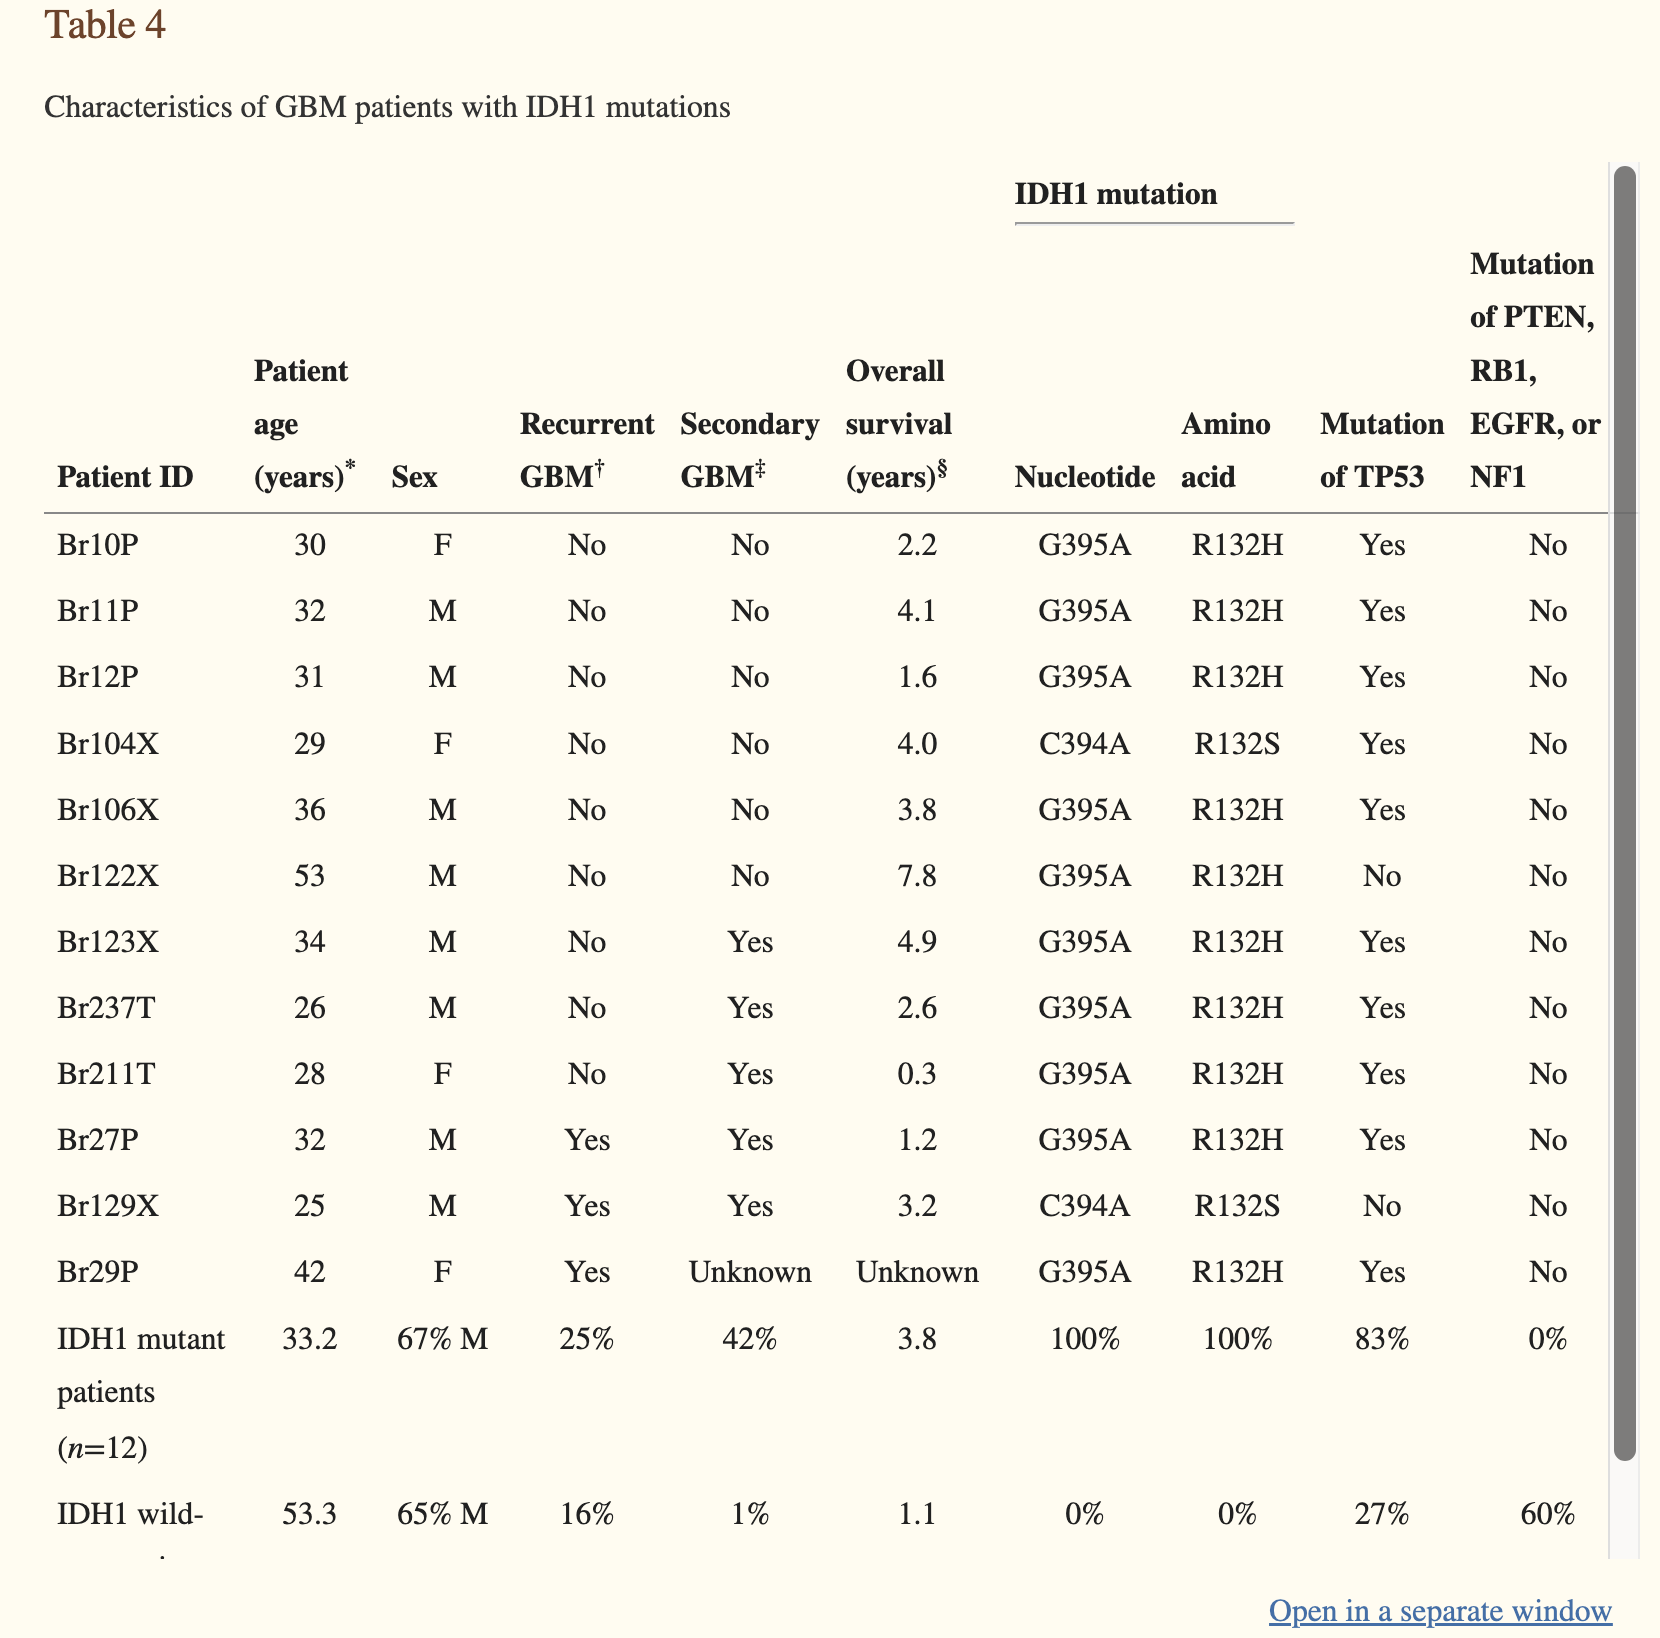

In [ ]:
from IPython.display import Image

# Path to the image
image_path = '/content/drive/MyDrive/Screen Shot 2024-04-18 at 10.26.13 PM.png'

# Display the image
display(Image(filename=image_path))

This figure shows data with clinical information for each patient with mutations in IDH1.

"Interestingly, patients with IDH1 mutations had a very high frequency of TP53 mutation and a very low frequency of mutations in other commonly altered GBM genes (Table 4)"

This is supported by the figure by the last 2 columns of the. we see total IDH1 mutants row that 83% of the mutants have a mutation in TP53 as well, but 0% of the IDH1 mutants have a mutation in PTEN, RB1, EGFR, or NF1 which are genes that tend to have high mutation rates in glioblastoma.